<a href="https://colab.research.google.com/github/nikag2006/cap-comp215/blob/main/labs/lab04-graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 4 (Graphs)
-------------------------
#### Name: Nika Ghassemi
#### Date: Mon Jan 26 2026

This lab exercise is an introduction to Graphs and Graph Analysis using [NetworkX](https://networkx.org/documentation/stable/).

**New Python concepts**:
  * **NetworkX** is an open-source package.  It provides a `Graph` object to represent a graph.
  * Built-in `random` module provides algorithms for generating pseudo-random sequences
  * [Generator expression](https://towardsdatascience.com/understanding-generator-expressions-in-python-fe0c4534619) - similar to a list comprehension, but faster and using much less memory!

**Credits**:
    Code examples based on [Think Complexity, 2nd edition](https://thinkcomplex.com).
    Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

As usual, the first code cell simply imports all the modules we'll be using...

In [ ]:
%matplotlib inline

import math
import random
from timeit import timeit

import matplotlib.pyplot as plt
import networkx as nx

## ER Graph algorithms.

from the textbook...
> One of the more interesting [random graphs](https://en.wikipedia.org/wiki/Random_graph) is the Erdős-Rényi model, studied by Paul Erdős and Alfréd Rényi in the 1960s.

> An Erdős-Rényi graph (ER graph) is characterized by two parameters: $n$ is the number of nodes and $p$ is the probability that there is an edge between any two nodes.

> Erdős and Rényi studied the properties of these random graphs; one of their surprising results is the existence of abrupt changes in the properties of random graphs as random edges are added.

In this lab we will work towards re-producing this famous computational experiment.

We can start with all the code we developed in class.
Review development of these algorithms in teh `week04-graphs` workbook.


We `seed` Python's built-in random number generator so we get the same sequence each time (to facilitate debugging and comprehension!)  Comment this out and re-run the notebook when you are ready to run experiments.

In [ ]:
random.seed(6) # Comment this out to run randomized experiments

In [ ]:
def all_pairs(objects):
    """ Return a generator with the complete set of distinct object pairs, as 2-tuples, from the given iterable of objects """
    return ((a, b) for i in range(1, len(objects)) for a,b in zip(objects, objects[i:]))

# unit tests
assert set( all_pairs(('w', 'x', 'y', 'z')) ) == {('w', 'x'), ('x', 'y'), ('y', 'z'), ('w', 'y'), ('x', 'z'), ('w', 'z')}

In [ ]:
def coin_toss(p=0.5):
    """ Simulate flipping a biased "coin", where the probability of 'heads' is p.  Return True if 'heads', False otherwise """
    return random.random() < p

In [ ]:
def random_pairs(objects, p=0.5):
    """ Return a generator of random subset of distinct object pairs (2-tuples), each with a probability of `p` """
    return (pair for pair in all_pairs(objects) if coin_toss(p))  # "flip a coin" to determine whether a given pair is included.

# Notice: no way to automate tests for random functions because they produce "side-effects" !!!
list( random_pairs(('w', 'x', 'y', 'z'), p=0.5) )

[('y', 'z'), ('w', 'y'), ('x', 'z')]

In [ ]:
def make_random_graph(n, p):
    """ Return an ER Graph with n nodes, where the probability of an edge between a pair of nodes in p """
    graph = nx.Graph()
    labels = range(n)
    graph.add_nodes_from(labels)
    graph.add_edges_from(random_pairs(labels, p))
    return graph

### Experiment:  Randomly connected graphs
The following experiment creates a graph with $N$ nodes where the probability of any 2 nodes being connected is $p$

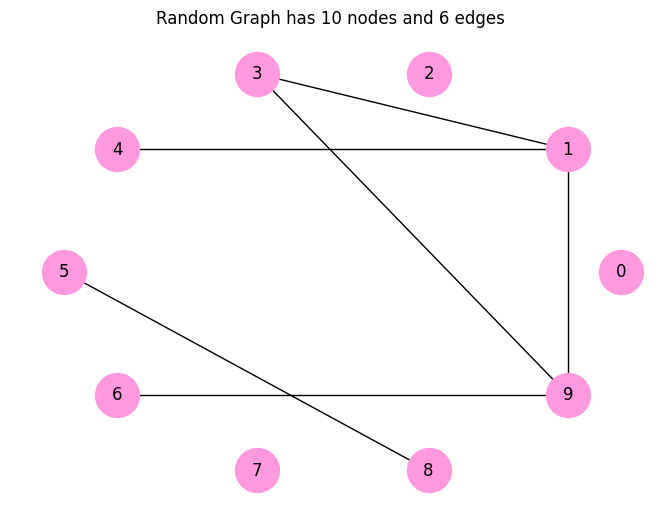

In [ ]:
N = 10
p = 0.2

random_graph = make_random_graph(N, p)

nx.draw_circular(random_graph,
                 node_color='#ff99dd',
                 node_size=1000,
                 with_labels=True)
plt.gca().set(
    title=f'Random Graph has {random_graph.number_of_nodes()} nodes and {random_graph.number_of_edges()} edges'
)
plt.show()

In [ ]:
def reachable_nodes(graph, start):
    """ return the set of nodes that are reachable from the given start node"""
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(graph.neighbors(node))
    return seen

In [ ]:
def is_connected(graph):
    """ Return True if the graph is connected, false otherwise. """
    start = next(iter(graph))   # grab the first node in the graph.  This statement will need some further explanation.
    reachable = reachable_nodes(graph, start)
    return len(reachable) == len(graph)

In [ ]:
is_connected(random_graph)

False

## Lab Exercises

### Exercise 1
Use `timeit` to run an experiment that times the `reachable_nodes` algorithm.
Once you understand how `timeit` works, design a small experiment to time the `reachable_nodes` algorithm for a range of graph sizes (`n`)
Plot the results of your experiment, where x = graph size (`n`) and y = avg. execution time in seconds

In [ ]:
# here's an example of how to use timeit:
N = 100
p = 1
g = make_random_graph(N, p)  # when p=1, this is a complete graph!
timing_trials = 5
seconds = timeit(lambda: reachable_nodes( g,  0),  number=timing_trials)
f'Avg. time to execute: {seconds/timing_trials} seconds'

'Avg. time to execute: 0.0007441760000801878 seconds'

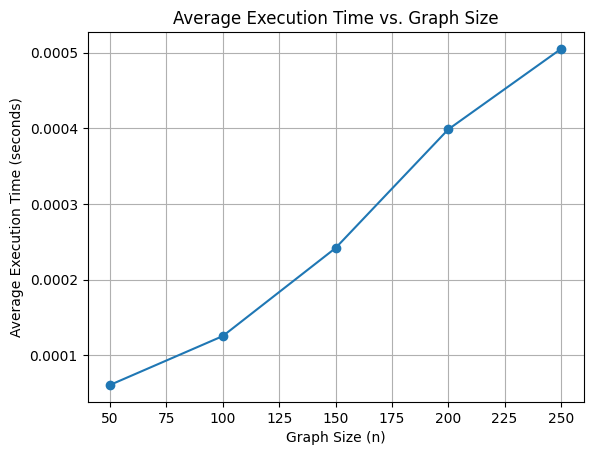

In [ ]:
# Ex. 1 your code here...
graph_sizes = [50, 100, 150, 200, 250]
avg_times = []
trials = 5

for n in graph_sizes:
    p = 0.1
    g = make_random_graph(n, p)
    seconds = timeit(lambda: reachable_nodes(g, 0), number=trials)
    avg_time = seconds / trials
    avg_times.append(avg_time)

plt.plot(graph_sizes, avg_times, marker='o')
plt.xlabel('Graph Size (n)')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Average Execution Time vs. Graph Size')
plt.grid(True)
plt.show()

### Exercise 2:
What is the **Big-O time complexity** of the `reachable_nodes` algorithm?


#### Ex. 2 Your Answer:
The reachable_nodes function performs a depth-first traversal of the graph starting from a given node. Each node is visited at most once, contributing O(N), and each edge is examined at most once while iterating over neighbors, contributing O(M). Therefore, the total time complexity for a general graph with N nodes and M edges is O(N + M). In the special case of a complete graph, where M = N(N-1)/2 which is approximately O(N^2), the total complexity becomes O(N + N^2) = O(N^2). Thus, reachable_nodes runs in O(N + M) for general graphs and O(N^2) for complete graphs.

## Likelihood of connectivity

We are ready to replicate Erdős and Rényi's computational experiment.
In this experiment, we estimate the likelihood that a randomly-generated ER graph is connected.

Like most computational experiments, we simple "brute force" the solution - create a big pile of ER graphs, and simply count up how many of them are connected.

### Exercise 3:
Write a function that runs one ER experiment for a given value of $n$ and $p$.

The function generates `n_trials` (number of trials) graphs and returns the proportion of them that are connected.

In [ ]:
def proportion_connected(n, p, n_trials=100):
    """ Return the proportion of random ER Graphs (n, p) that are connected out of n_trials. """
    # Ex. 3 your code here...
    # Step 1: make n_trials random graphs
    connected_graphs = 0
    for _ in range(n_trials):
        graph = make_random_graph(n, p)
        if is_connected(graph):
            connected_graphs += 1

    # Step 2: compute the proportion of those graphs that are connected
    return connected_graphs / n_trials

n = 30
p = 0.1
p_connected = proportion_connected(n, p)*100
f'Likelihood that an ER graph (n={n}, p={p}) is connected: {p_connected:.1f}%'

'Likelihood that an ER graph (n=30, p=0.1) is connected: 26.0%'

### Exercise 4:
Our experimental results will be more accurate (i.e., show less variation between runs) when we use large for `n_trials`.  But we've seen that large values for `n` can cause serious performance issues.
Experiment a little to find a reasonable value of `n_trials` to experiment with.  Ideally you would produce a timing graph like the one in Ex. 1, but that's optional

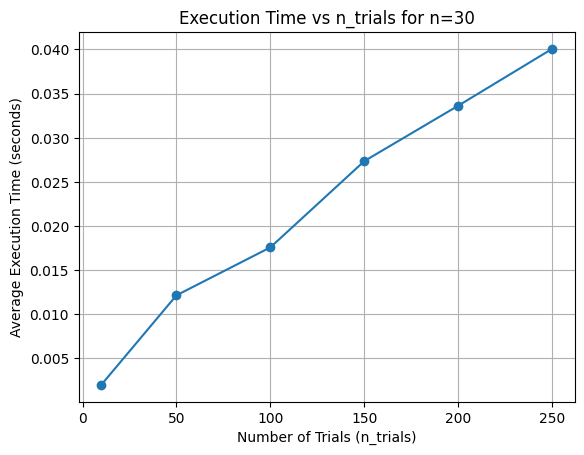

In [ ]:
# Ex. 4 timing experiments
n = 30
p = 0.1
n_trials_list = [10, 50, 100, 150, 200, 250]
avg_times = []
trials = 5

for n_trials in n_trials_list:
    seconds = timeit(lambda: proportion_connected(n, p, n_trials), number=trials)
    avg_time = seconds / trials
    avg_times.append(avg_time)

plt.plot(n_trials_list, avg_times, marker='o')
plt.xlabel('Number of Trials (n_trials)')
plt.ylabel('Average Execution Time (seconds)')
plt.title(f'Execution Time vs n_trials for n={n}')
plt.grid(True)
plt.show()

What is a reasonable value for `n_trials` to use in the experimental setup below where we will run trials for 20 different values of $p$?

#### Your Answer:
Since we need to run the function for 20 different values of p and the graph size is n=30, choosing a very large n_trials would make the experiment take longer than necessary, while using too few trials could give noisy results that vary a lot between runs. From my timing graph, n_trials = 200 seems to be a good compromise. It gives more stable estimates without making the total runtime too long. All 20 values of p finish in under about a second. So, a reasonable choice for this experiment is n_trials = 200.

## Critical Value of $p$

Near a "critical value" of $p$, the likelihood of a random graph being connected rapidly changes from near 0 to near 1.
Erdős and Rényi predict the critical value should be:  $ln(n) / n$
For example...

In [ ]:
n = 30
f'Erdős and Rényi predict the critical value of p for graphs of size {n} = {math.log(n) / n:0.3f}'

'Erdős and Rényi predict the critical value of p for graphs of size 30 = 0.113'

### Exercise 5:
Develop an experimental setup that estimates the `proportion_connected` for different values for $p$.
You will need to define a suitable range of values for $p$, and choose a value for $n_trials$ (determined above).
The goal of this experiment is to plot $p$ against `proportion_connected(p)` to identify the "critical value" of $p$ for graphs of size $n$.  This will be the point where the random graphs change from being primarily disconnected to being primarily connected.

Predicted critical p for n=30: 0.113


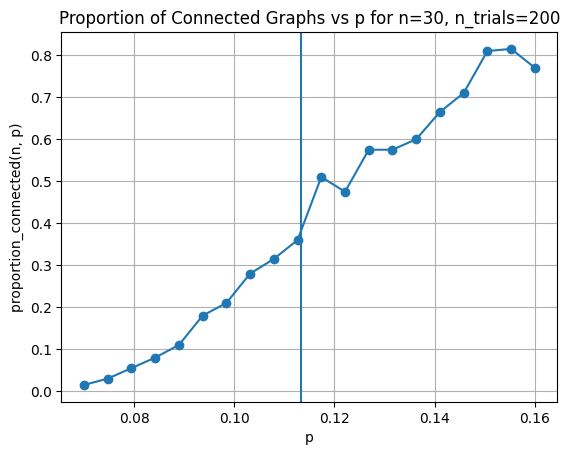

In [ ]:
# Ex. 5 your code here...
import numpy as np
n = 30
n_trials = 200

p_critical = math.log(n) / n
print(f"Predicted critical p for n={n}: {p_critical:.3f}")

p_values = np.linspace(0.07, 0.16, 20)

props = []
for p in p_values:
    props.append(proportion_connected(n, p, n_trials))

# Plot results
plt.plot(p_values, props, marker='o')
plt.axvline(p_critical)
plt.xlabel("p")
plt.ylabel("proportion_connected(n, p)")
plt.title(f"Proportion of Connected Graphs vs p for n={n}, n_trials={n_trials}")
plt.grid(True)
plt.show()

### Exercise 6:
Does your experiment confirm or refute Erdős and Rényi's results?

What real-world applications / implications might this understanding of graph connectivity have?

#### Ex. 6 Your Answer:
My experiment confirms Erdos and Renyi’s prediction about the critical value of p. For n=30, their model predicts the connectivity threshold should occur around p=ln(30)/30≈0.113. In my results, the proportion of connected graphs stays very low for smaller values of p, but then increases quickly once p gets close to about 0.11–0.12. This matches the idea of a “critical value,” where the graph suddenly shifts from being mostly disconnected to mostly connected. The change is not perfectly sharp because the graphs are random and n is not extremely large, but the overall trend still lines up well with the theoretical prediction.

This idea is useful because many real systems can be modeled as networks. For example, in wireless/IoT and computer networks, it helps estimate how many connections are needed before the system becomes reliably connected. It also relates to how quickly information spreads in social networks or how robust infrastructure networks are against failures.